# `hexgrid`

The hexgrid routine is not adaptive but simply creates a grid of hexagonal shaped masks. Hexagons are a natural tiling element. They are the regular polygon with the most number of sides that can uniformly tile an image. As such they are the closest approximation to circular grid.

The pixel values in the infile are not used to create the grid; only the image dimensions.

As sidelen becomes small, there can be some quantization like effects/rough edges. A practical limit of 3 pixel is used.

The xref,yref location basically sets the “phase” of the hexagonal grid. It provides a way to keep the grid from spiting a single feature into multiple adjoining grids.

In [1]:
ciaover 
echo Today is `date`

CIAO 4.11 Wednesday, December  5, 2018
  bindir      : /export/ciao-4.11/bin
  CALDB       : 4.8.2
Today is Mon Jan 21 16:37:58 EST 2019


In [2]:
# Routine to display images using ds9 in notebook
display_map()
{
img=$1
map=$2
png=$3
reg=$4

if test x${reg} == x
then
  region=""
else
  region="-region $reg"
fi

ds9 -geom 1550x824 -scale asinh -scale limits 0 200 \
  -zoom 2 -cmap load sunset-in-atlantis.sao  \
  -view info no -view panner no -view magnifier no -view buttons no -view colorbar no \
  $img \
  -frame new -cmap load $ASCDS_INSTALL/contrib/data/16_ramps.lut \
  $map -scale linear -scale mode minmax \
  $region -regions select all -regions color black -regions select none \
  -tile yes \
  -saveimage png $png -exit 

display < $png
}

In [3]:
#/bin/rm -rf ./tmp
#mkdir ./tmp
ASCDS_WORK_PATH=`pwd`/tmp

### Example

In [4]:
# Determine the location of the centroid in logical pixel coordinates
dmstat smimg.fits cen-
px=`stk_read_num ")dmstat.out_max_loc" 1 echo+`
py=`stk_read_num ")dmstat.out_max_loc" 2 echo+`
dmcoords smimg.fits op=sky x=$px y=$py

CONVOLVE
    min:	0.0066826618277 	      @:	( 4438.5 4550.5 )
    max:	126.03153992 	      @:	( 4274.5 3954.5 )
   mean:	6.624006713 
  sigma:	10.931784032 
    sum:	486056.36459 
   good:	73378 
   null:	59846 


In [5]:
hexgrid img.dss.fits hex.map side=10 bin=hex.img \
  xref=")dmcoords.logicalx" yref=")dmcoords.logicaly" clob+

In [6]:
map2reg hex.map hex.reg clob+

map2reg
          infile = hex.map
         outfile = hex.reg
         verbose = 1
         clobber = yes
            mode = ql

218
12
318
415
425
219
39
319
426
320
40
220
427
321
221
41
428
322
222
42
429
323
230
66
430
231
324
67
431
232
68
325
432
69
233
326
433
70
234
327
434
71
235
328
435
236
72
329
436
94
237
330
437
95
238
331
438
96
239
332
439
97
240
333
440
98
241
339
441
99
340
242
442
100
341
243
443
101
342
244
455
102
343
245
121
456
246
344
122
457
345
247
123
458
346
248
459
124
347
249
460
125
250
348
461
126
251
349
462
127
257
350
463
128
351
258
464
129
259
352
465
130
260
353
466
261
131
354
467
262
132
355
468
148
263
356
469
149
264
357
470
265
150
358
485
266
151
359
267
486
152
360
268
487
153
361
269
488
154
367
270
489
155
368
271
490
156
369
491
272
157
370
492
273
158
371
274
493
159
372
275
494
160
373
276
495
161
374
277
496
375
162
278
497
376
176
279
515
377
177
284
516
178
378
285
517
179
379
286
518
180
380
287
519
181
381
288
182
520
382
289
183
5

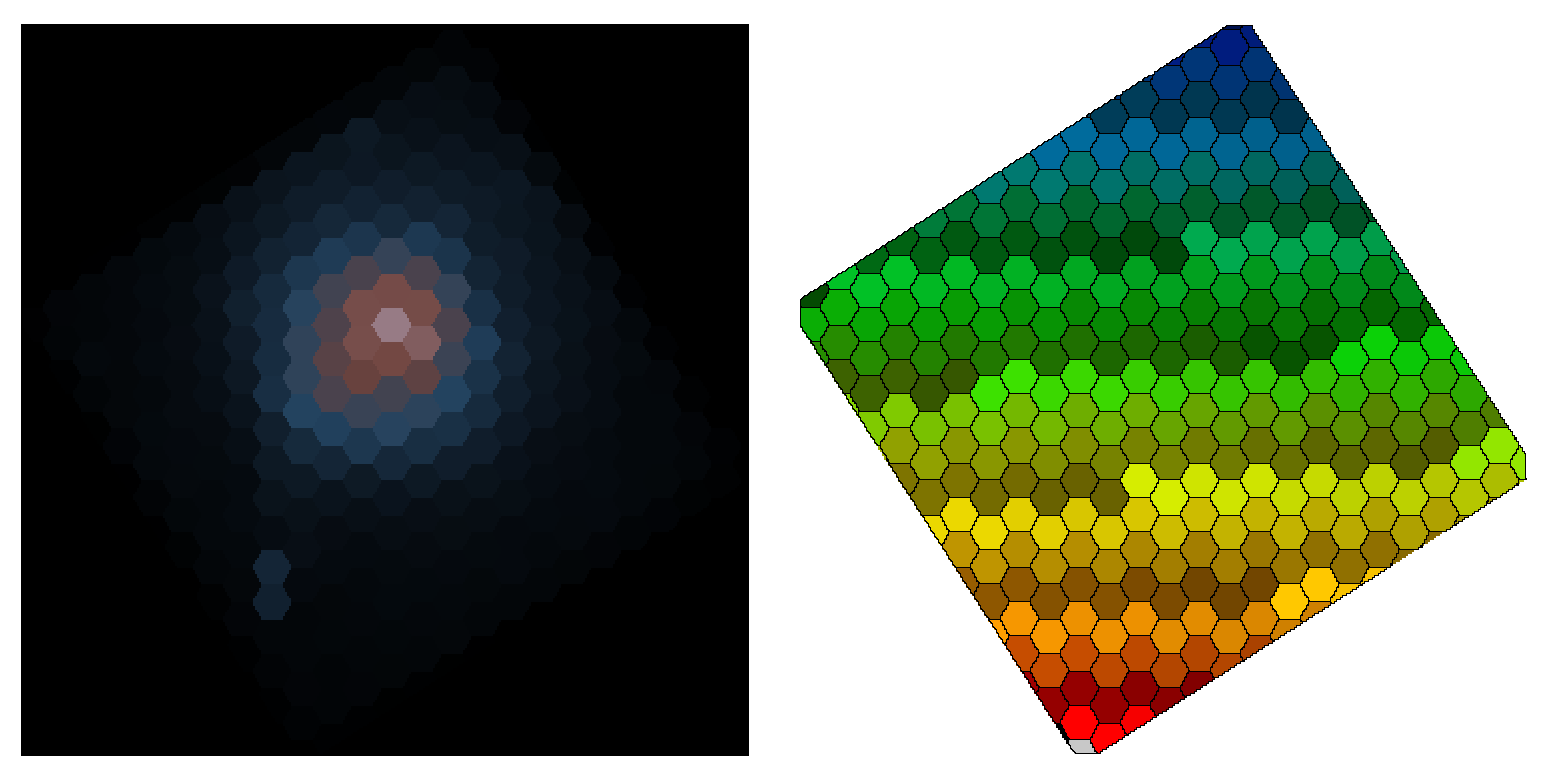

In [7]:
display_map hex.img hex.map hex.png hex.reg

> **TBD** we could also rotate the hexagons +/-90 deg 